Group: 14 \
Name(Student Number): \
Jun Zheng(10827335), \
                      JIAWEI GUO(ZOE) (98802358) \
                      Sacha Dehnel (18803304) 

# Finding investment properties in Melbourne

## Introduction
  In recent years, global housing has experienced robust growth, but some regions have faced decline. Melbourne is known for its diversity and cultural scene, and it is always a popular  real estate scene that attracts investors globally. In our project, we will mainly focus on the housing prices in Melbourne. We will explore whether a property is worth the investment in Melbourne. In essence, “What houses in Melbourne are undervalued, and thus a potential investment?”            To answer this question, we will use the Melbourne Housing Dataset. In this dataset we have 21 columns, of which we will only focus on eight of them. These are: the number of rooms, distance from city center, number of bathrooms, property size, building area, the year the building was constructed, its location, number of properties in the suburb as our predictors and the price of the property as our response variable.



## Preliminary exploratory data analysis
### Reading Data
We read the data by a relative path and we find that the Address is not tidy and actually we do not need that so we just delete that column and get the tidy version of the dataframe.

In [62]:
# Reading Data by a relative path
library(tidyverse)
data <- read_csv("melb_data.csv")
data <- data[, -2]
head(data)

Rows: 13580 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Suburb, Address, Type, Method, SellerG, Date, CouncilArea, Regionname
dbl (13): Rooms, Price, Distance, Postcode, Bedroom2, Bathroom, Car, Landsiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
Abbotsford,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,2,1,1,202,NA,NA,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
Abbotsford,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,2,1,0,156,79,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
Abbotsford,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,3,2,0,134,150,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
Abbotsford,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,3,2,1,94,NA,NA,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
Abbotsford,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,3,1,2,120,142,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
Abbotsford,2,h,941000,S,Jellis,7/05/2016,2.5,3067,2,1,0,181,NA,NA,Yarra,-37.8041,144.9953,Northern Metropolitan,4019


#### Here is the table of summary of the tidy version of the data and we can see each mean, median and number of obeservations for the data.

In [57]:
summary(data)

    Suburb              Rooms            Type               Price        
 Length:13580       Min.   : 1.000   Length:13580       Min.   :  85000  
 Class :character   1st Qu.: 2.000   Class :character   1st Qu.: 650000  
 Mode  :character   Median : 3.000   Mode  :character   Median : 903000  
                    Mean   : 2.938                      Mean   :1075684  
                    3rd Qu.: 3.000                      3rd Qu.:1330000  
                    Max.   :10.000                      Max.   :9000000  
                                                                         
    Method            SellerG              Date              Distance    
 Length:13580       Length:13580       Length:13580       Min.   : 0.00  
 Class :character   Class :character   Class :character   1st Qu.: 6.10  
 Mode  :character   Mode  :character   Mode  :character   Median : 9.20  
                                                          Mean   :10.14  
                                      

#### Here is a ggplot of regression line to show the relation between the Landsize and the Price from the data.

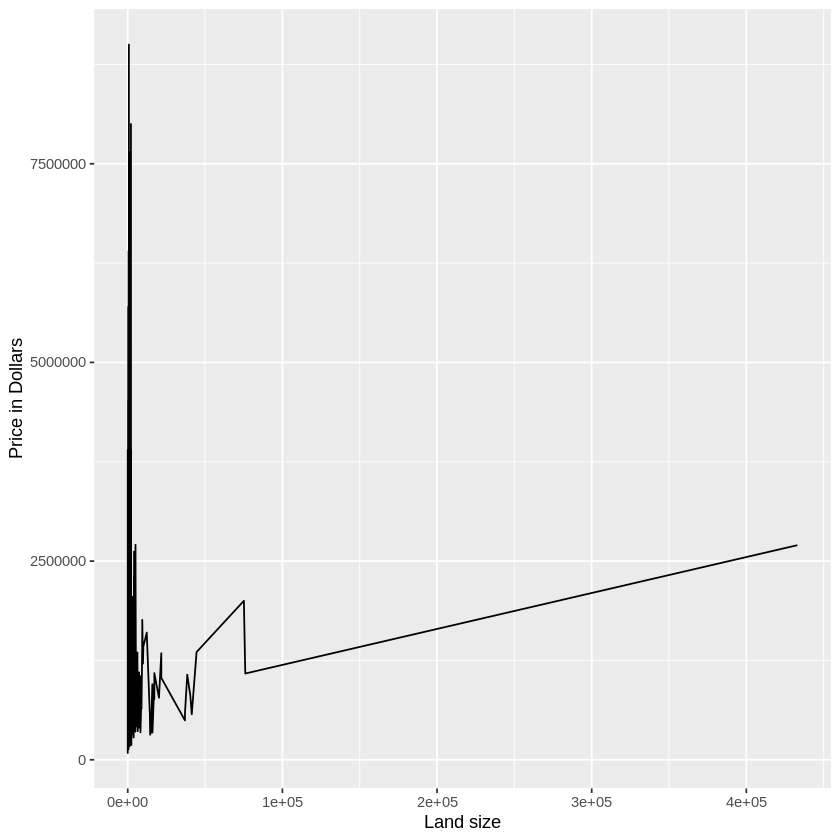

In [64]:
plot1 <- data |>
         ggplot(aes(x = Landsize, y = Price))+
         geom_line()+
         labs(x = "Land size", y = "Price in Dollars")
plot1

## Methods
### Cleaning Data
We are going to do a regression model for this data and predict which variable would influence the housing price most. And we just choose Rooms， Distance， Bathroom， Landsize， Building Area, YearBuilt, Regionname，Propertycount from the data to do the prediction. And also we need to clean up the NA in the data set to help make the data be better.

In [63]:
# Cleaning Data
data <- data |>
        mutate(Regionname = as_factor(Regionname))
data_fv <- data |>
            select(Suburb, Rooms, Price, Distance, Bathroom, Landsize, BuildingArea, YearBuilt, Regionname, Propertycount)|>
            na.omit()

head(data_fv)     

Suburb,Rooms,Price,Distance,Bathroom,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Abbotsford,2,1035000,2.5,1,156,79,1900,Northern Metropolitan,4019
Abbotsford,3,1465000,2.5,2,134,150,1900,Northern Metropolitan,4019
Abbotsford,4,1600000,2.5,1,120,142,2014,Northern Metropolitan,4019
Abbotsford,3,1876000,2.5,2,245,210,1910,Northern Metropolitan,4019
Abbotsford,2,1636000,2.5,1,256,107,1890,Northern Metropolitan,4019
Abbotsford,2,1097000,2.5,1,220,75,1900,Northern Metropolitan,4019


And for the visulization, we are going to use the ggplot to show the regression line of each predictor with the response variables. By this way, we can clarify the relationship between each predictor and response variables and determine which predictor would be the one has most influence to the response variable.

## Expected outcomes and significance

We expect to find that the majority of houses are properly valued. The properties that have a predicted price above their actual market price are possibly undervalued and thus could be potential investments. There are too many unknown variables such as the state of the property, the surroundings, its access to services such as electricity, water, sewage that our data does not contain so we cannot say for certain that a property is worth the investment. However, at the very least it will cut down on the time wasted viewing properties that are considerably overpriced. Due to the time and money constraints, there are still many other variables we have not considered in our model, so this may make our model not very accurate. This leads us to wonder what truly are these other variables that we have not accounted for.
